In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_parquet('../../data/processed/clustered_data_all_feature.parquet')

In [3]:
df = data.copy()

In [4]:
# df.to_csv('../../data/processed/clustered_data_all_feature.csv', index=False)

In [5]:
df.columns

Index(['id_prenotazione', 'id_paziente', 'data_nascita', 'sesso',
       'regione_residenza', 'tipologia_servizio', 'descrizione_attivita',
       'data_contatto', 'tipologia_struttura_erogazione',
       'id_professionista_sanitario', 'tipologia_professionista_sanitario',
       'data_erogazione', 'durata_erogazione_sec', 'fascia_eta', 'anno',
       'quadrimestre', 'incremento_teleassistenze', 'cluster'],
      dtype='object')

### 1. Distribuzione delle Categorie di Incremento (Bar Plot)

/tmp/ipykernel_2535/151962264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='incremento_teleassistenze', data=df, palette='viridis')


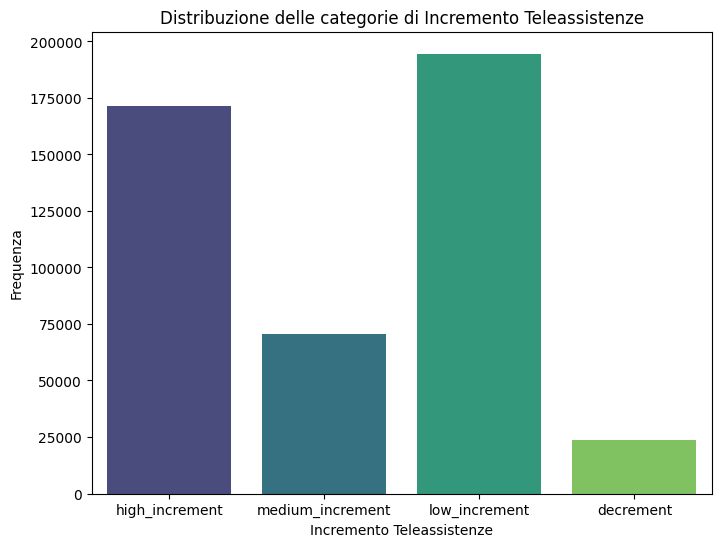

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(x='incremento_teleassistenze', data=df, palette='viridis')
plt.title('Distribuzione delle categorie di Incremento Teleassistenze')
plt.xlabel('Incremento Teleassistenze')
plt.ylabel('Frequenza')
plt.show()

### Confronto tra Clusters e Incremento Teleassistenze - Stacked Bar Plot

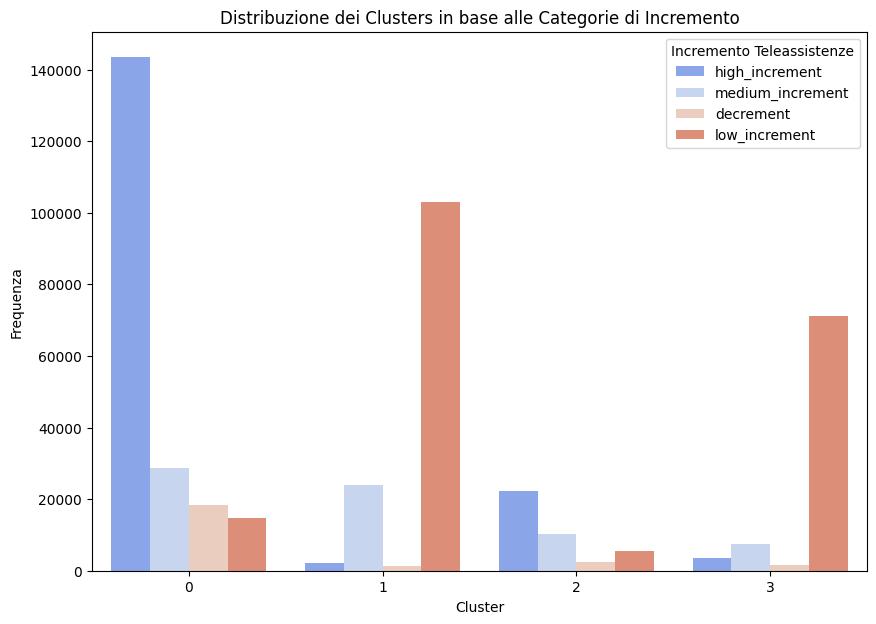

In [7]:
# Grafico a barre raggruppate
plt.figure(figsize=(10,7))
sns.countplot(x='cluster', hue='incremento_teleassistenze', data=df, palette='coolwarm')
plt.title('Distribuzione dei Clusters in base alle Categorie di Incremento')
plt.xlabel('Cluster')
plt.ylabel('Frequenza')
plt.legend(title='Incremento Teleassistenze')
plt.show()

### 3. Durata dell'Erogazione vs Incremento - Boxplot

/tmp/ipykernel_2535/117295177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='incremento_teleassistenze', y='durata_erogazione_sec', data=df, palette='Set2')


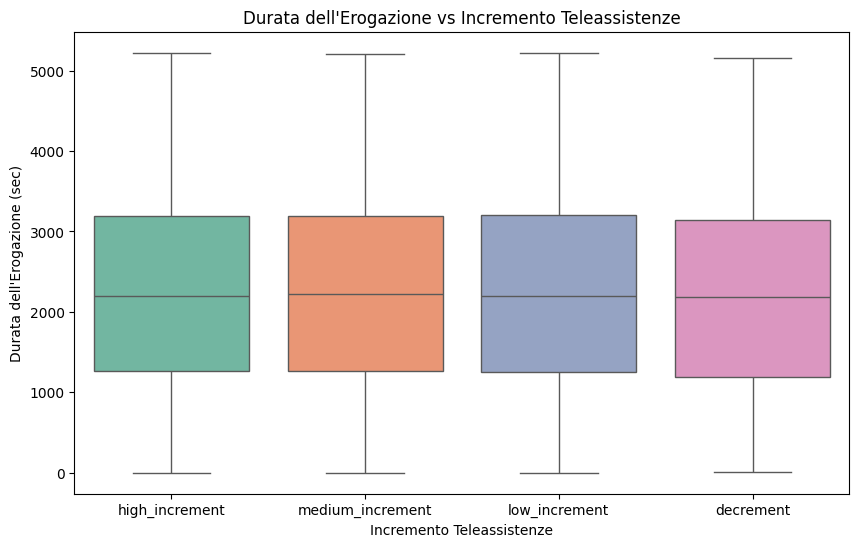

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x='incremento_teleassistenze', y='durata_erogazione_sec', data=df, palette='Set2')
plt.title('Durata dell\'Erogazione vs Incremento Teleassistenze')
plt.xlabel('Incremento Teleassistenze')
plt.ylabel('Durata dell\'Erogazione (sec)')
plt.show()


### 4. Distribuzione Regionale vs Incremento - Bar Plot

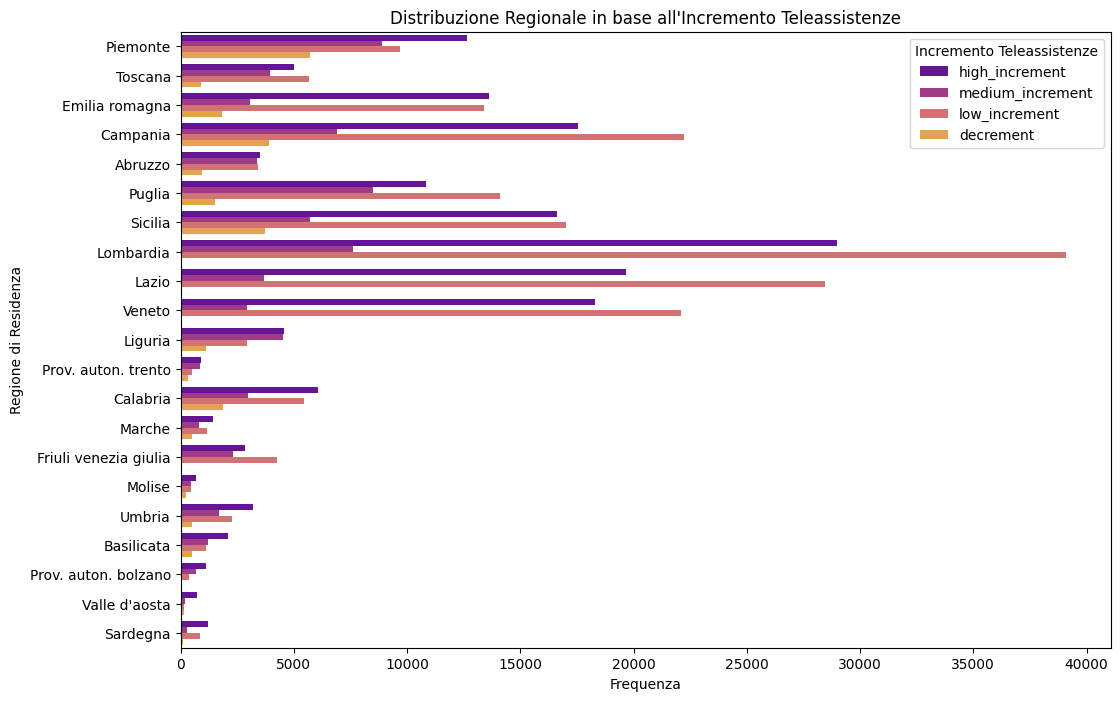

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(y='regione_residenza', hue='incremento_teleassistenze', data=df, palette='plasma')
plt.title('Distribuzione Regionale in base all\'Incremento Teleassistenze')
plt.xlabel('Frequenza')
plt.ylabel('Regione di Residenza')
plt.legend(title='Incremento Teleassistenze')
plt.show()


### 5. Distribuzione per Fascia di Età vs Incremento - Boxplot

/tmp/ipykernel_2535/3101909316.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='incremento_teleassistenze', y='fascia_eta', data=df, palette='Blues')


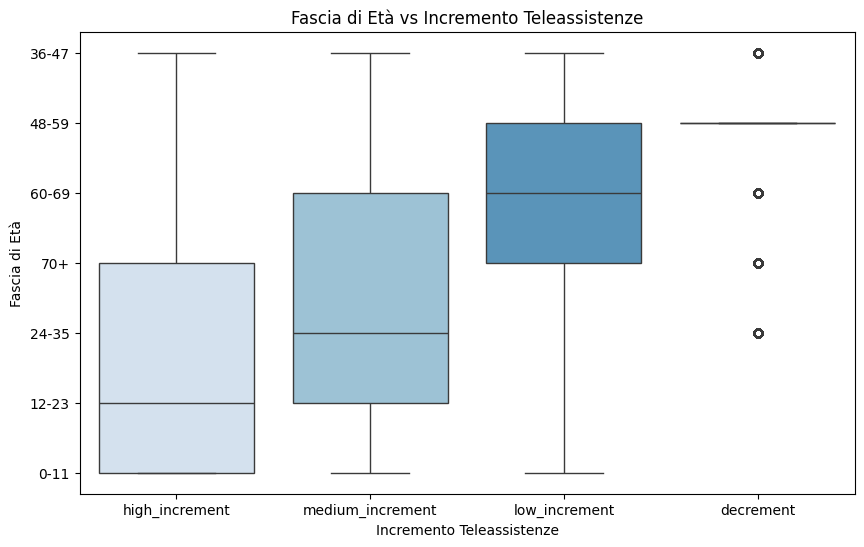

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='incremento_teleassistenze', y='fascia_eta', data=df, palette='Blues')
plt.title('Fascia di Età vs Incremento Teleassistenze')
plt.xlabel('Incremento Teleassistenze')
plt.ylabel('Fascia di Età')
plt.show()


### 8. Analisi Temporale - Grafico a Linee

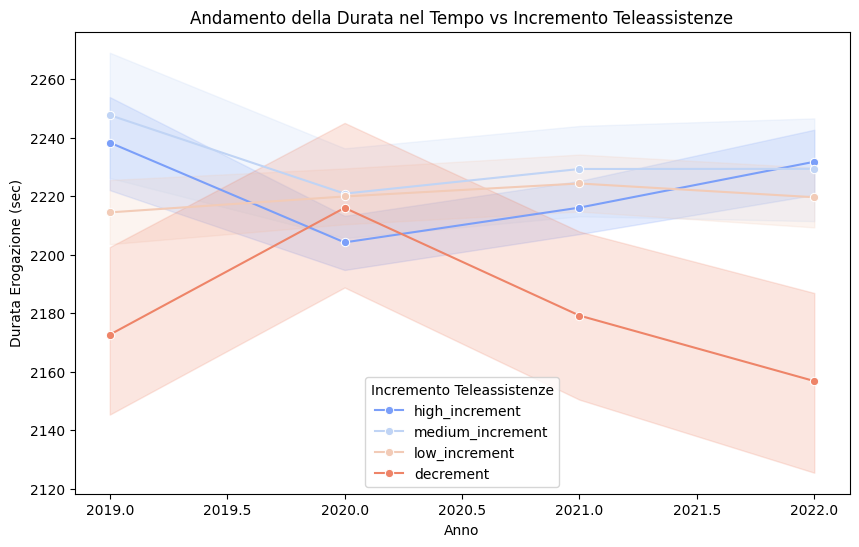

In [11]:
# Distribuzione temporale dell'incremento (utilizzando 'anno' o 'quadrimestre')
plt.figure(figsize=(10,6))
sns.lineplot(x='anno', y='durata_erogazione_sec', hue='incremento_teleassistenze', data=df, palette='coolwarm', marker="o")
plt.title('Andamento della Durata nel Tempo vs Incremento Teleassistenze')
plt.xlabel('Anno')
plt.ylabel('Durata Erogazione (sec)')
plt.legend(title='Incremento Teleassistenze')
plt.show()


In [12]:
import requests

In [13]:

# Supponendo che 'df' sia il tuo DataFrame originale
# Crea un dataset con conteggio per regione
df_region_count = df.groupby('regione_residenza').size().reset_index(name='count')

# URL del GeoJSON delle regioni italiane
geojson_url = 'https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson'

# Recupera il file GeoJSON
response = requests.get(geojson_url)
geojson_data = response.json()



# Crea una mappa delle regioni italiane con Plotly
fig = px.choropleth(df_region_count, 
                    geojson=geojson_data,
                    locations='regione_residenza', 
                    featureidkey="properties.name", 
                    color='count',
                    title='Distribuzione delle Teleassistenze per Regione',
                    color_continuous_scale="Viridis",
                    labels={'count':'Numero di Teleassistenze'})

# Imposta la proiezione e l'aspetto della mappa
fig.update_geos(fitbounds="locations", visible=False)

# Mostra il grafico interattivo
# fig.show()

# Esporta come file HTML
fig.write_html("mappa_teleassistenze_regioni.html")